In [1]:
from __future__ import division
from neuron import h
from neuron import gui
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

## Build Model

In [2]:
h("create soma")
h.soma.L    = 10 # um
h.soma.diam = 10 # um
h.soma.Ra   = 100
h.soma.insert('pas')
h.soma.g_pas = 1/10000 # 1/Rm - Rm ohm*cm^2

h("create dend")
h.dend.L    = 500  # um
h.dend.diam = 1    # um
h.dend.Ra   = 100  # ohm*cm
h.dend.insert('pas')
h.dend.g_pas = 1/10000

h.dend.connect(h.soma, 1, 0)  #connect the end of the soma to the start of the dendrite

h("forall { nseg = int((L/(0.1*lambda_f(100))+0.9)/2)*2 + 1  }");

# set up experiment

In [3]:
stim = h.IClamp(h.soma(0.5))  # add a current clamp the the middle of the soma
stim.delay = 10  # ms
stim.dur   = 100 # ms
stim.amp   = 0.1 # nA

soma_v = h.Vector()  # set up a recording vector
soma_v.record(h.soma(0.5)._ref_v)  # record voltage at the middle of the soma

# Record voltage from all segments in the dendrite
dend_vs = []
for seg in h.dend:
	dend_vs.append(h.Vector())
	dend_vs[-1].record(seg._ref_v)

t = h.Vector()
t.record(h._ref_t)  #record time.
h.v_init = -70  # set starting voltage 
h.tstop = 200  # set simulation time
h.run();  # run simulation

## plot results

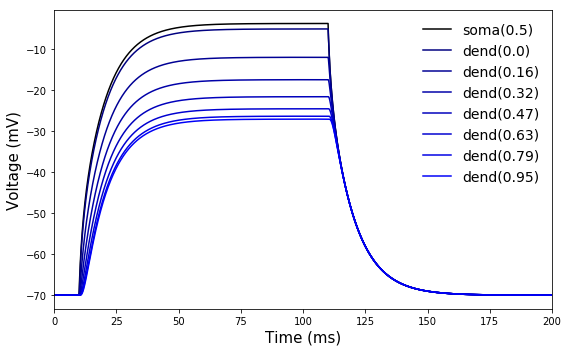

In [4]:
plt.figure(figsize=(8,5))
plt.plot(t, soma_v,color='k',label='soma(0.5)')
for i,v in list(enumerate(dend_vs))[::3]:
	plt.plot(t, v, color=(0,0,0.5+0.5*i/len(dend_vs)), 
		     label = 'dend({:.2})'.format(i/len(dend_vs)))

plt.xlim(0,200)
plt.xlabel('Time (ms)', fontsize = 15)
plt.ylabel('Voltage (mV)', fontsize = 15)
plt.legend(fontsize = 14, frameon=False)
plt.tight_layout()

## Add active channels to the soma and run simulation

In [5]:
h.tstop = 25
stim.dur = 5
h.soma.insert('kv') # add potassium channel
h.soma.gbar_kv = 2000 # set the potassium conductance

h.soma.insert('na') # add sodium channel
h.soma.gbar_na = 10000 # set the sodium conductance
h.celsius = 30

h.run();

0.0

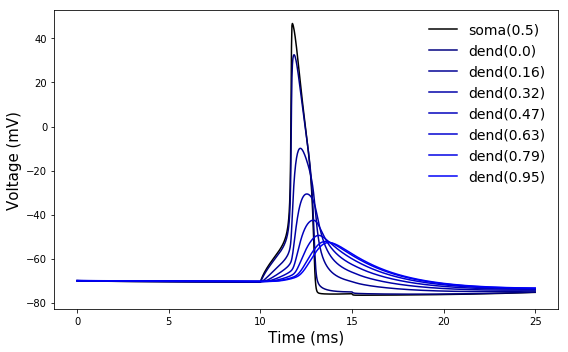

In [6]:
plt.figure(figsize=(8,5))
plt.plot(t, soma_v,color='k',label='soma(0.5)')
for i,v in list(enumerate(dend_vs))[::3]:
    plt.plot(t, v, color=(0,0,0.5+0.5*i/len(dend_vs)), 
            label = 'dend({:.2})'.format(i/len(dend_vs)))


plt.xlabel('Time (ms)', fontsize = 15)
plt.ylabel('Voltage (mV)', fontsize = 15)
plt.legend(fontsize = 14, frameon=False)
plt.tight_layout();